# **Práctica 3: Análisis exploratorio de datos**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com

# Contexto
Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

## Objetivo: 
Hacer un análisis exploratorio de datos con base en información obtenida de Yahoo Finanzas. Por ejemplo, datos de Spotify, Facebook, Amazon y Aeromexico.

## Fuente de datos:
De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [3]:
%pip install yfinance
#%pip install googlefinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

# 1. Análisis para Spotify

In [5]:
# Para Spotify
DataSpotify = yf.Ticker('SPOT')
DataSpotify

yfinance.Ticker object <SPOT>

In [6]:
SpotifyHist = DataSpotify.history(start = '2019-1-1', end='2022-09-09', interval='1d')
SpotifyHist
# Se muestran los primeros 10 valores: 
# * SpotifyHist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,111.660004,115.629997,110.360001,113.739998,861100,0,0
2019-01-03,112.080002,113.345001,108.589996,109.019997,1082300,0,0
2019-01-04,112.059998,121.470001,111.500000,118.510002,2484800,0,0
2019-01-07,115.040001,123.865997,113.279999,119.360001,2516200,0,0
2019-01-08,121.440002,122.769997,114.699997,117.480003,1257100,0,0
...,...,...,...,...,...,...,...
2022-09-01,106.059998,107.089996,102.180000,106.519997,1570600,0,0
2022-09-02,107.550003,108.290001,103.360001,104.419998,1405300,0,0
2022-09-06,104.059998,104.370003,100.620003,102.589996,962800,0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

## **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [7]:
SpotifyHist.shape

(929, 7)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [8]:
SpotifyHist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

Se observa que el conjunto de datos tiene únicamente variables numéricas (flotante e int).

## Paso 2: Identificación de datos faltantes

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [9]:
SpotifyHist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [10]:
SpotifyHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 2019-01-02 to 2022-09-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          929 non-null    float64
 1   High          929 non-null    float64
 2   Low           929 non-null    float64
 3   Close         929 non-null    float64
 4   Volume        929 non-null    int64  
 5   Dividends     929 non-null    int64  
 6   Stock Splits  929 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 58.1 KB


## Paso 3: Detección de valores atípicos

### 1) Distribución de variables numéricas

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

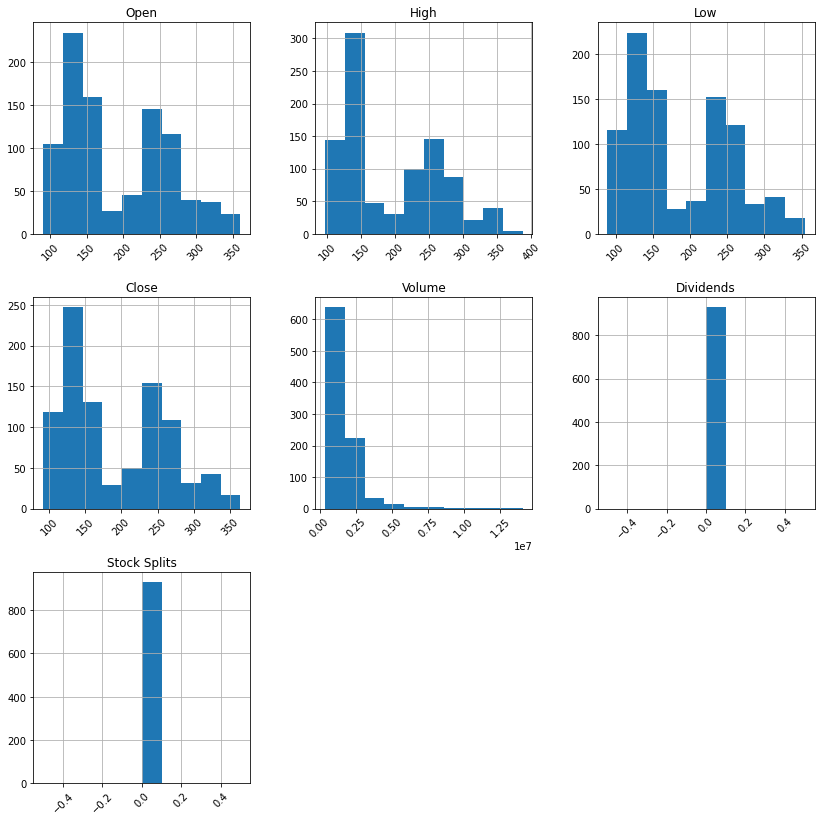

In [11]:
SpotifyHist.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma se observa que **Volume** tiene valores sesgados a la izquierda. Las variables **Dividens** y **Stock Splits** presentan valores en 'cero'.

### 2) Resumen estadístico de variables numéricas

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [12]:
SpotifyHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,929.000000,929.000000,929.000000,929.000000,9.290000e+02,929.0,929.0
mean,191.552433,195.510065,187.547271,191.574661,1.737269e+06,0.0,0.0
std,68.594830,70.033857,66.999183,68.497672,1.317504e+06,0.0,0.0
min,90.440002,97.070000,89.029999,91.940002,3.945000e+05,0.0,0.0
25%,136.500000,139.710007,134.210007,137.119995,1.050200e+06,0.0,0.0
50%,153.440002,156.800003,151.009995,154.309998,1.382100e+06,0.0,0.0
75%,249.679993,254.369995,245.309998,249.679993,1.987500e+06,0.0,0.0
max,360.910004,387.440002,354.178009,364.589996,1.404930e+07,0.0,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### 3) Diagramas para detectar posibles valores atípicos

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


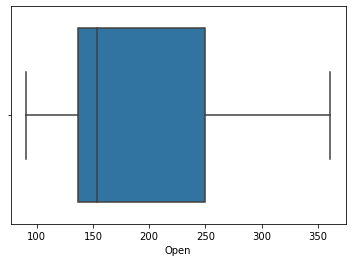

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


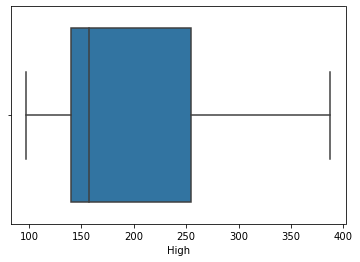

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


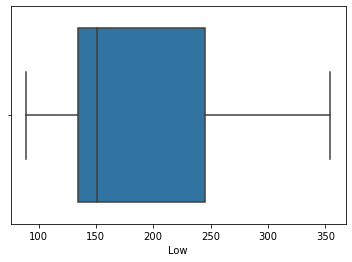

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


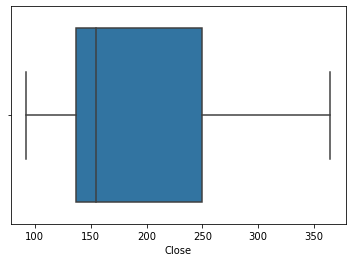

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


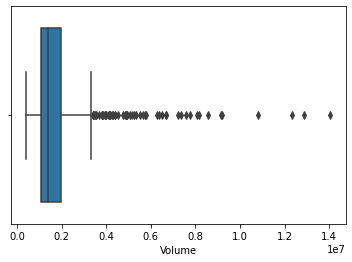

In [13]:
VariablesValoresAtipicos = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=SpotifyHist)
  plt.show()

Se observa que en Volume se tienen valores atípicos que están lejos de los otros valores.

### 4. Plot


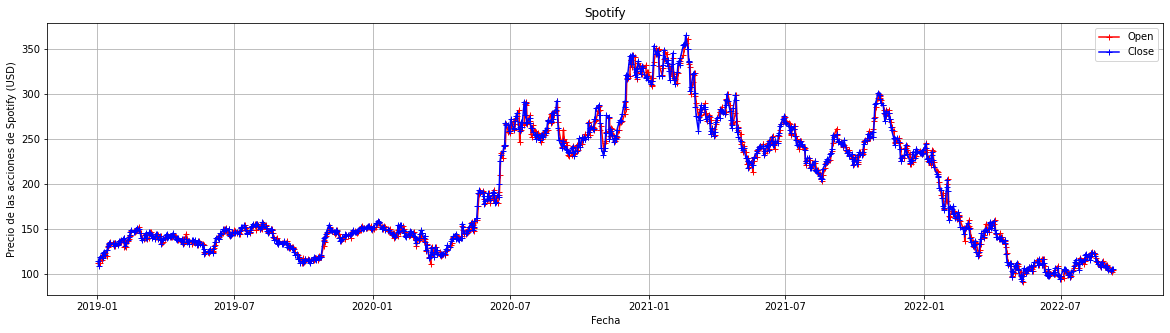

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(SpotifyHist['Open'], color='red', marker='+', label='Open')
plt.plot(SpotifyHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones de Spotify (USD)')
plt.title('Spotify')
plt.grid(True)
plt.legend()
plt.show()

## Paso 4: Identificación de relaciones entre pares variables

* Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
* Se emplea la función **corr()**

In [15]:
SpotifyHist.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998374,0.998516,0.996627,-0.025933,NaN,NaN
High,0.998374,1.000000,0.998188,0.998537,-0.003436,NaN,NaN
Low,0.998516,0.998188,1.000000,0.998480,-0.035483,NaN,NaN
Close,0.996627,0.998537,0.998480,1.000000,-0.016603,NaN,NaN
Volume,-0.025933,-0.003436,-0.035483,-0.016603,1.000000,NaN,NaN
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


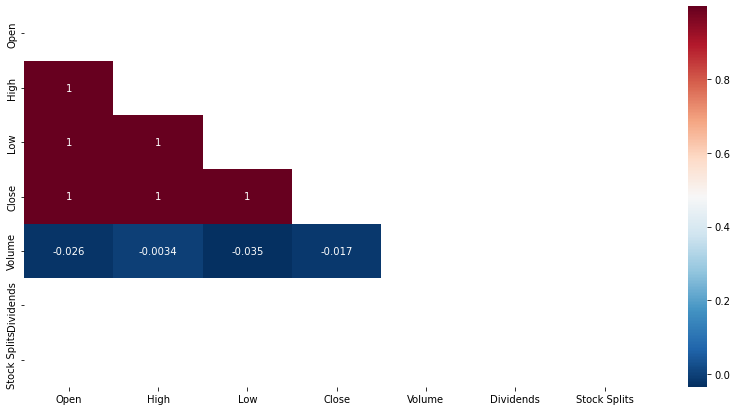

In [16]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(SpotifyHist.corr())
sns.heatmap(SpotifyHist.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.

Observaciones:
* Se puede observar que hay una correlación natural entre algunas variables, pero a continuación se hará el análisis de otras acciones y se observará la correlación que existe entre estas. 

# Análisis para Facebook
A continuación, se incluye el análisis de otras fuentes de datos:

In [17]:
# Para Facebook
DataFacebook = yf.Ticker('META')

In [18]:
FacebookHist = DataFacebook.history(start = '2019-01-01', end = '2022-09-09', interval='1d')
FacebookHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200,0,0
2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900,0,0
2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100,0,0
2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300,0,0
2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800,0,0
...,...,...,...,...,...,...,...
2022-09-01,163.580002,167.360001,160.350006,165.360001,30145700,0,0
2022-09-02,167.449997,167.929993,159.220001,160.320007,22609100,0,0
2022-09-06,160.100006,161.690002,157.690002,158.539993,19339800,0,0


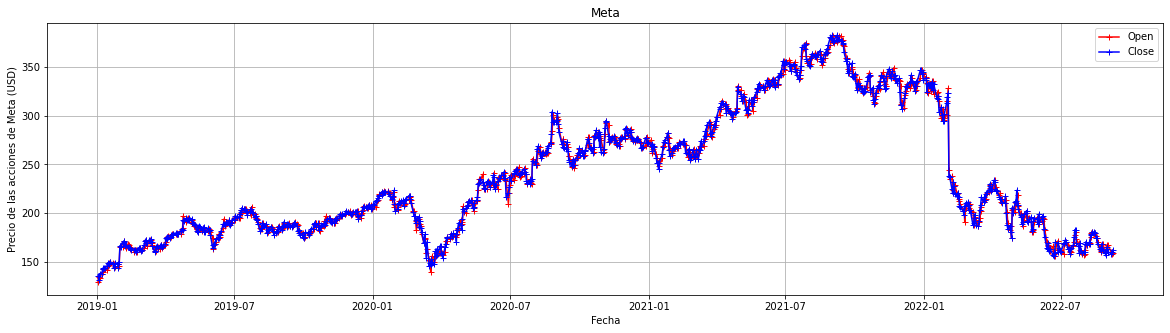

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(FacebookHist['Open'], color='red', marker='+', label='Open')
plt.plot(FacebookHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones de Meta (USD)')
plt.title('Meta')
plt.grid(True)
plt.legend()
plt.show()

# Análisis para Amazon

In [20]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [21]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2022-09-09', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0
2019-01-03,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0
2019-01-04,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0
2019-01-07,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0
2019-01-08,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0
...,...,...,...,...,...,...,...
2022-09-01,126.000000,128.020004,123.660004,127.820000,56636100,0,0.0
2022-09-02,129.500000,131.380005,126.389999,127.510002,57378500,0,0.0
2022-09-06,127.919998,128.619995,124.739998,126.110001,43888600,0,0.0


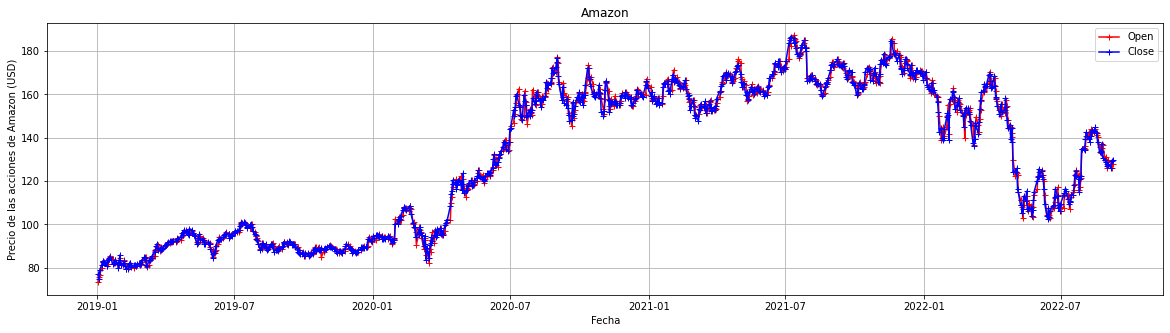

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='red', marker='+', label='Open')
plt.plot(AmazonHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones de Amazon (USD)')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

# Análisis para Aeroméxico

In [23]:
# Para Aeroméxico
DataAeromex = yf.Ticker('AEROMEX.MX')

In [24]:
AeromexHist = DataAeromex.history(start = '2019-1-1', end = '2022-09-09', interval='1d')
AeromexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,22.000000,23.080000,22.000000,22.530001,54890,0,0
2019-01-03,22.500000,23.049999,22.500000,22.770000,88098,0,0
2019-01-04,23.430000,23.840000,22.780001,23.160000,69569,0,0
2019-01-07,23.180000,24.500000,23.100000,23.270000,160120,0,0
2019-01-08,23.219999,23.870001,22.820000,23.230000,190421,0,0
...,...,...,...,...,...,...,...
2022-09-02,198.979996,198.979996,198.979996,198.979996,0,0,0
2022-09-05,198.979996,198.979996,198.979996,198.979996,0,0,0
2022-09-06,192.470001,192.470001,191.460007,191.460007,567,0,0


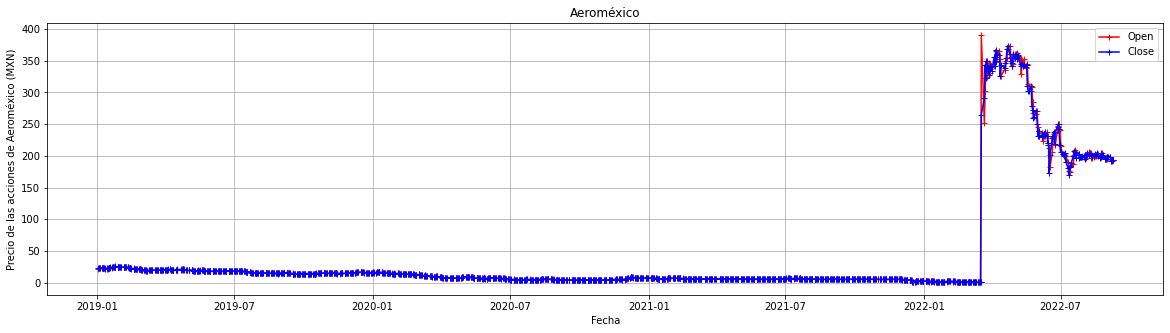

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(AeromexHist['Open'], color='red', marker='+', label='Open')
plt.plot(AeromexHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones de Aeroméxico (MXN)')
plt.title('Aeroméxico')
plt.grid(True)
plt.legend()
plt.show()

# Integrando los datos en un solo análisis

In [26]:
SpotifyClose = SpotifyHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
SpotifyClose.rename(columns = {'Close': 'Spotify'}, inplace = True)
SpotifyClose

,Spotify
Date,
2019-01-02,113.739998
2019-01-03,109.019997
2019-01-04,118.510002
2019-01-07,119.360001
2019-01-08,117.480003
...,...
2022-09-01,106.519997
2022-09-02,104.419998
2022-09-06,102.589996


In [27]:
FacebookClose = FacebookHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
FacebookClose.rename(columns = {'Close': 'Facebook'}, inplace = True)
FacebookClose

,Facebook
Date,
2019-01-02,135.679993
2019-01-03,131.740005
2019-01-04,137.949997
2019-01-07,138.050003
2019-01-08,142.529999
...,...
2022-09-01,165.360001
2022-09-02,160.320007
2022-09-06,158.539993


In [28]:
AmazonClose = AmazonHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AmazonClose.rename(columns = {'Close': 'Amazon'}, inplace = True)
AmazonClose

,Amazon
Date,
2019-01-02,76.956497
2019-01-03,75.014000
2019-01-04,78.769501
2019-01-07,81.475502
2019-01-08,82.829002
...,...
2022-09-01,127.820000
2022-09-02,127.510002
2022-09-06,126.110001


In [29]:
AeromexClose = AeromexHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AeromexClose.rename(columns = {'Close': 'Aeromexico'}, inplace = True)
AeromexClose

,Aeromexico
Date,
2019-01-02,22.530001
2019-01-03,22.770000
2019-01-04,23.160000
2019-01-07,23.270000
2019-01-08,23.230000
...,...
2022-09-02,198.979996
2022-09-05,198.979996
2022-09-06,191.460007


In [30]:
# Se integran los cierres del precio de las acciones
Acciones = pd.concat([SpotifyClose, FacebookClose, AmazonClose, AeromexClose], 
                    axis = 'columns', join = 'inner')
Acciones

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-09-01,106.519997,165.360001,127.820000,198.979996
2022-09-02,104.419998,160.320007,127.510002,198.979996
2022-09-06,102.589996,158.539993,126.110001,191.460007


In [31]:
# En caso de tener valores nulos
AccionesNN = Acciones.dropna()
AccionesNN

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-09-01,106.519997,165.360001,127.820000,198.979996
2022-09-02,104.419998,160.320007,127.510002,198.979996
2022-09-06,102.589996,158.539993,126.110001,191.460007


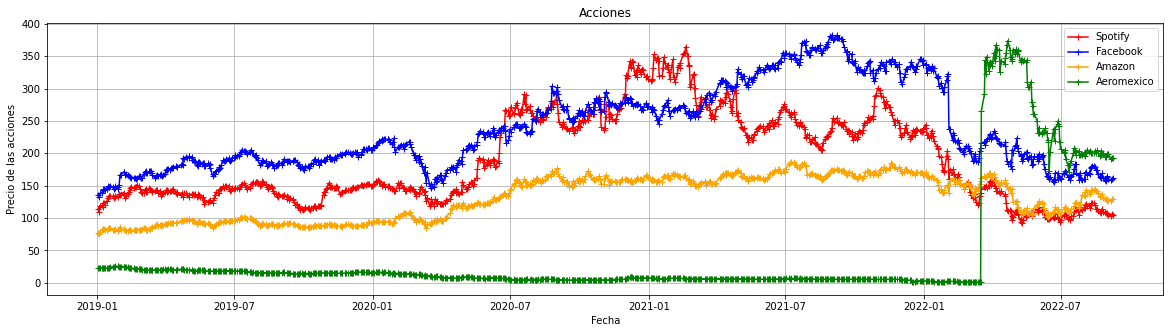

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(Acciones['Spotify'], color='red', marker='+', label='Spotify')
plt.plot(Acciones['Facebook'], color='blue', marker='+', label='Facebook')
plt.plot(Acciones['Amazon'], color='orange', marker='+', label='Amazon')
plt.plot(Acciones['Aeromexico'], color='green', marker='+', label='Aeromexico')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones')
plt.grid(True)
plt.legend()
plt.show()

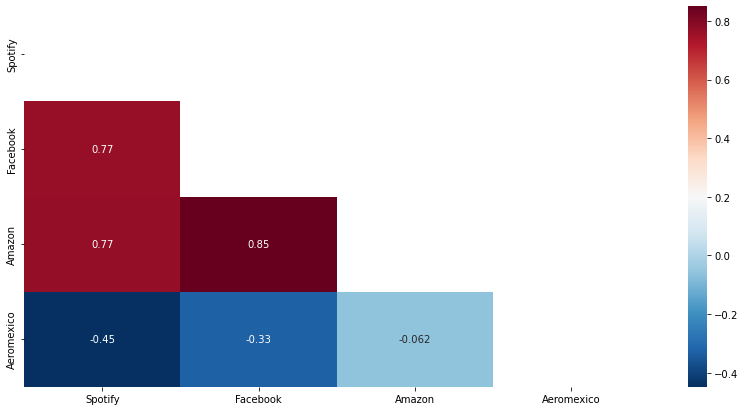

In [33]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Acciones.corr())
sns.heatmap(Acciones.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [34]:
Acciones.corr()

,Spotify,Facebook,Amazon,Aeromexico
Spotify,1.000000,0.765191,0.773088,-0.447994
Facebook,0.765191,1.000000,0.849904,-0.328027
Amazon,0.773088,0.849904,1.000000,-0.061895
Aeromexico,-0.447994,-0.328027,-0.061895,1.000000


In [35]:
DataAcciones = yf.download(['SPOT', 'META', 'AMZN', 'AEROMEX.MX'], start='2019-1-1', end='2022-09-09', 
                interval='1d')
DataAcciones

[*********************100%***********************]  4 of 4 completed


Adj Close                                           Close  \
            AEROMEX.MX        AMZN        META        SPOT  AEROMEX.MX   
Date                                                                     
2019-01-02   22.530001   76.956497  135.679993  113.739998   22.530001   
2019-01-03   22.770000   75.014000  131.740005  109.019997   22.770000   
2019-01-04   23.160000   78.769501  137.949997  118.510002   23.160000   
2019-01-07   23.270000   81.475502  138.050003  119.360001   23.270000   
2019-01-08   23.230000   82.829002  142.529999  117.480003   23.230000   
...                ...         ...         ...         ...         ...   
2022-09-02  198.979996  127.510002  160.320007  104.419998  198.979996   
2022-09-05  198.979996         NaN         NaN         NaN  198.979996   
2022-09-06  191.460007  126.110001  158.539993  102.589996  191.460007   
2022-09-07  193.029999  129.479996  160.389999  105.860001  193.029999   
2022-09-08  193.029999  129.820007  162.059998  105.180000  193.029999   

                                                      High              ...  \
                  AMZN        META        SPOT  AEROMEX.MX        AMZN  ...   
Date                                                                    ...   
2019-01-02   76.956497  135.679993  113.739998   23.080000   77.667999  ...   
2019-01-03   75.014000  131.740005  109.019997   23.049999   76.900002  ...   
2019-01-04   78.769501  137.949997  118.510002   23.840000   79.699997  ...   
2019-01-07   81.475502  138.050003  119.360001   24.500000   81.727997  ...   
2019-01-08   82.829002  142.529999  117.480003   23.870001   83.830498  ...   
...                ...         ...         ...         ...         ...  ...   
2022-09-02  127.510002  160.320007  104.419998  198.979996  131.380005  ...   
2022-09-05         NaN         NaN         NaN  198.979996         NaN  ...   
2022-09-06  126.110001  158.539993  102.589996  192.470001  128.619995  ...   
2022-09-07  129.479996  160.389999  105.860001  193.029999  129.820007  ...   
2022-09-08  129.820007  162.059998  105.180000  193.029999  130.279999  ...   

                   Low                    Open                          \
                  META        SPOT  AEROMEX.MX        AMZN        META   
Date                                                                     
2019-01-02  128.559998  110.360001   22.000000   73.260002  128.990005   
2019-01-03  131.119995  108.589996   22.500000   76.000504  134.690002   
2019-01-04  133.750000  111.500000   23.430000   76.500000  134.009995   
2019-01-07  135.910004  113.279999   23.180000   80.115501  137.559998   
2019-01-08  139.539993  114.699997   23.219999   83.234497  139.889999   
...                ...         ...         ...         ...         ...   
2022-09-02  159.220001  103.360001  198.979996  129.500000  167.449997   
2022-09-05         NaN         NaN  198.979996         NaN         NaN   
2022-09-06  157.690002  100.620003  192.470001  127.919998  160.100006   
2022-09-07  156.809998  102.349998  191.500000  126.120003  157.759995   
2022-09-08  157.740005  103.720001  193.029999  127.720001  158.710007   

                           Volume                                      
                  SPOT AEROMEX.MX         AMZN        META       SPOT  
Date                                                                   
2019-01-02  111.660004    54890.0  159662000.0  28146200.0   861100.0  
2019-01-03  112.080002    88098.0  139512000.0  22717900.0  1082300.0  
2019-01-04  112.059998    69569.0  183652000.0  29002100.0  2484800.0  
2019-01-07  115.040001   160120.0  159864000.0  20089300.0  2516200.0  
2019-01-08  121.440002   190421.0  177628000.0  26263800.0  1257100.0  
...                ...        ...          ...         ...        ...  
2022-09-02  107.550003        0.0   57378500.0  22609100.0  1405300.0  
2022-09-05         NaN        0.0          NaN         NaN        NaN  
2022-09-06  104.059998      567.0   4388

# Análisis para los ETFs: VOO, VWO, VEA y VGT.

## VOO

In [36]:
# Se muestra para VOO desde Yahoo Finance
DataVOO = yf.Ticker('VOO.MX')
DataVOO

yfinance.Ticker object <VOO.MX>

In [37]:
VOOHist = DataVOO.history(start = '2019-01-01', end='2022-09-09',interval='1d')
VOOHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,4520.000000,4520.000000,4513.430176,4513.430176,7887,0,0
2019-01-03,4535.990234,4535.990234,4434.399902,4434.399902,1743,0,0
2019-01-04,4434.399902,4434.399902,4434.399902,4434.399902,0,0,0
2019-01-07,4535.000000,4546.549805,4535.000000,4536.180176,582,0,0
2019-01-08,4543.000000,4570.629883,4543.000000,4570.629883,9185,0,0
...,...,...,...,...,...,...,...
2022-09-02,7324.709961,7389.979980,7205.000000,7210.000000,908,0,0
2022-09-05,7219.330078,7219.330078,7219.330078,7219.330078,14,0,0
2022-09-06,7219.330078,7330.000000,7210.009766,7235.009766,983,0,0


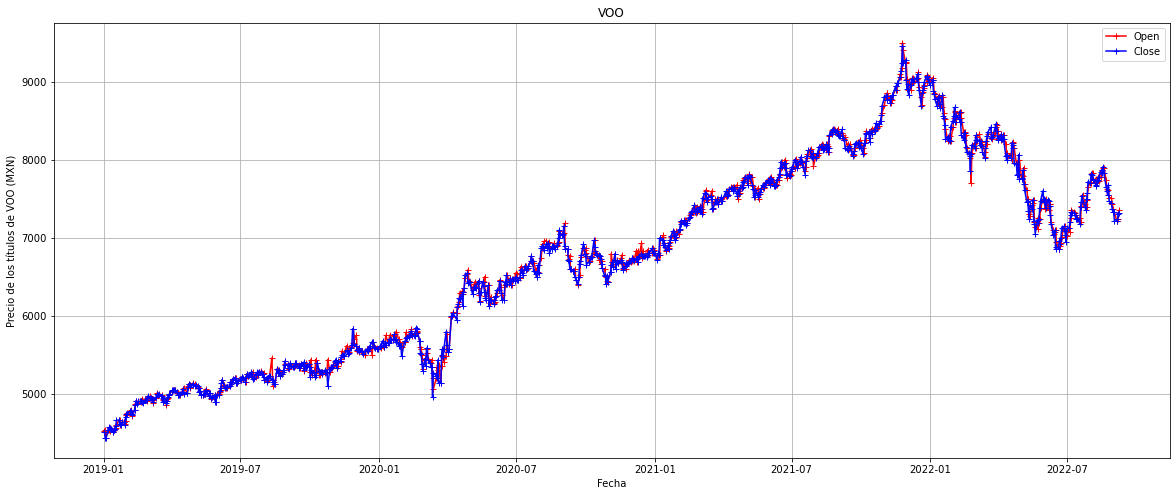

In [38]:
plt.figure(figsize=(20, 8))
plt.plot(VOOHist['Open'], color='red', marker='+', label='Open')
plt.plot(VOOHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de los títulos de VOO (MXN)')
plt.title('VOO')
plt.grid(True)
plt.legend()
plt.show()

## VWO

In [39]:
# Se muestra para VWO desde Yahoo Finance
DataVWO = yf.Ticker('VWO.MX')
DataVWO

yfinance.Ticker object <VWO.MX>

In [40]:
VWOHist = DataVWO.history(start = '2019-01-01', end='2022-09-09',interval='1d')
VWOHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,748.349976,748.349976,748.349976,748.349976,851,0,0
2019-01-03,748.349976,748.349976,748.349976,748.349976,0,0,0
2019-01-04,767.440002,767.440002,755.000000,755.000000,29,0,0
2019-01-07,755.000000,755.000000,755.000000,755.000000,512,0,0
2019-01-08,756.250000,758.500000,756.250000,758.500000,6131,0,0
...,...,...,...,...,...,...,...
2022-09-02,830.000000,830.000000,815.000000,815.000000,160,0,0
2022-09-05,815.000000,815.000000,815.000000,815.000000,57,0,0
2022-09-06,819.150024,820.010010,812.000000,812.000000,451,0,0


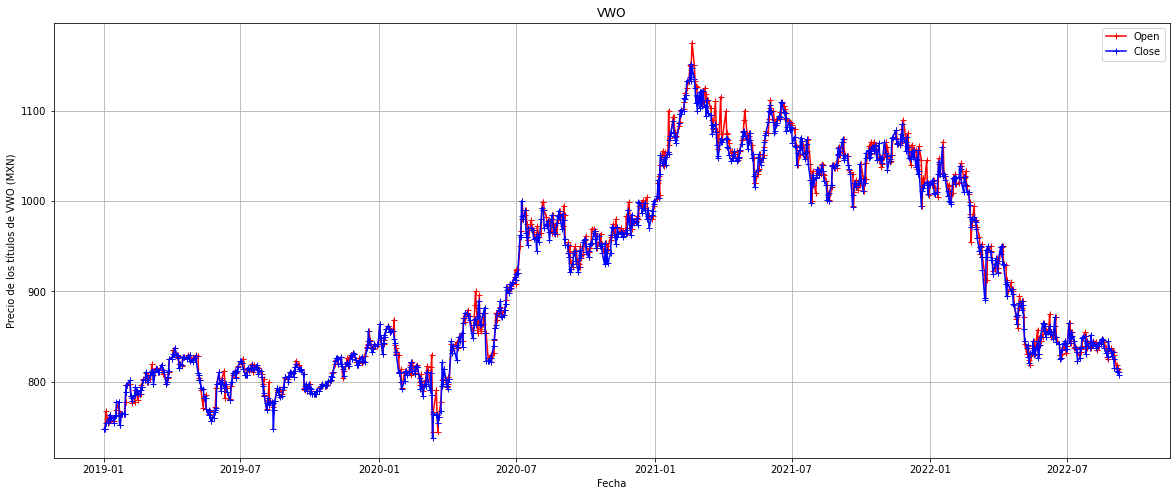

In [41]:
plt.figure(figsize=(20, 8))
plt.plot(VWOHist['Open'], color='red', marker='+', label='Open')
plt.plot(VWOHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de los títulos de VWO (MXN)')
plt.title('VWO')
plt.grid(True)
plt.legend()
plt.show()

## VEA

In [42]:
# Se muestra para VEA desde Yahoo Finance
DataVEA = yf.Ticker('VEA.MX')
DataVEA

yfinance.Ticker object <VEA.MX>

In [43]:
VEAHist = DataVEA.history(start = '2019-01-01', end='2022-09-09',interval='1d')
VEAHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,724.000000,724.000000,724.000000,724.000000,100,0,0
2019-01-03,720.000000,720.000000,720.000000,720.000000,100,0,0
2019-01-04,720.000000,720.000000,720.000000,720.000000,0,0,0
2019-01-07,733.099976,736.500000,733.099976,736.500000,5670,0,0
2019-01-08,736.500000,736.500000,736.500000,736.500000,0,0,0
...,...,...,...,...,...,...,...
2022-09-02,812.309998,812.309998,800.000000,804.000000,346,0,0
2022-09-05,815.000000,815.000000,792.390015,792.390015,247,0,0
2022-09-06,795.320007,812.789978,792.419983,792.419983,1304,0,0


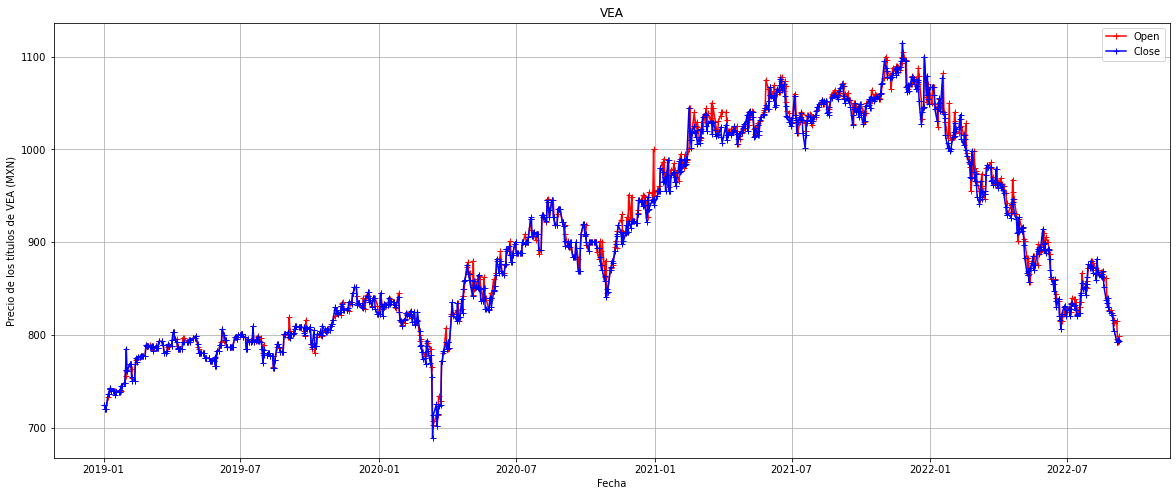

In [44]:
plt.figure(figsize=(20, 8))
plt.plot(VEAHist['Open'], color='red', marker='+', label='Open')
plt.plot(VEAHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de los títulos de VEA (MXN)')
plt.title('VEA')
plt.grid(True)
plt.legend()
plt.show()

## VGT

In [45]:
# Se muestra para VGT desde Yahoo Finance
DataVGT = yf.Ticker('VGT.MX')
DataVGT

yfinance.Ticker object <VGT.MX>

In [46]:
VGTHist = DataVGT.history(start = '2019-01-01', end='2022-09-09',interval='1d')
VGTHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,3234.000000,3234.000000,3234.000000,3234.000000,220,0,0
2019-01-03,3182.030029,3182.030029,3182.030029,3182.030029,13,0,0
2019-01-04,3196.879883,3196.879883,3196.879883,3196.879883,15800,0,0
2019-01-07,3196.879883,3196.879883,3196.879883,3196.879883,0,0,0
2019-01-08,3252.520020,3252.520020,3252.520020,3252.520020,30659,0,0
...,...,...,...,...,...,...,...
2022-09-02,6830.009766,6830.009766,6830.009766,6830.009766,0,0,0
2022-09-05,7050.000000,7050.000000,7050.000000,7050.000000,6,0,0
2022-09-06,6900.000000,6900.000000,6839.000000,6875.520020,135,0,0


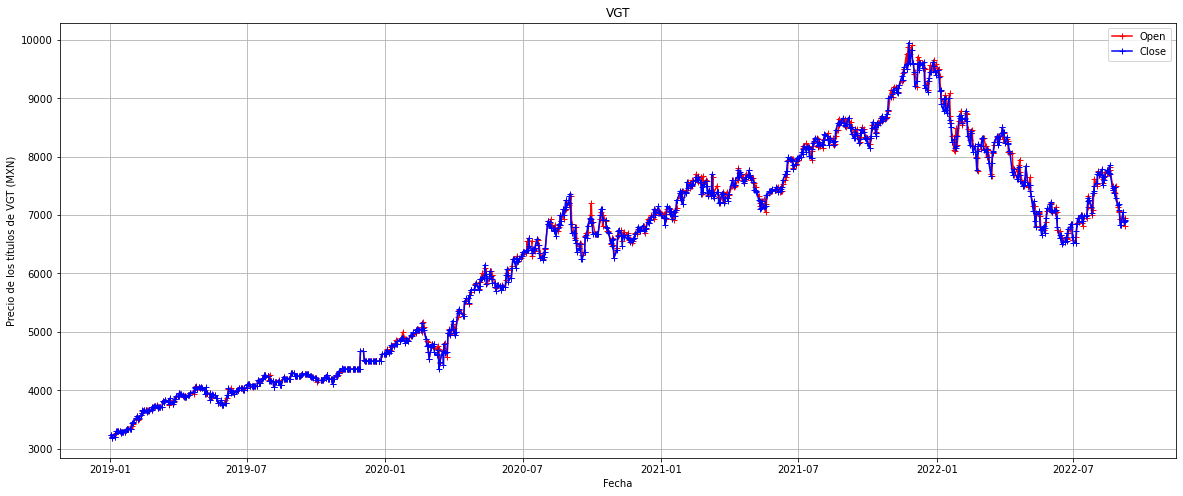

In [47]:
plt.figure(figsize=(20, 8))
plt.plot(VGTHist['Open'], color='red', marker='+', label='Open')
plt.plot(VGTHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de los títulos de VGT (MXN)')
plt.title('VGT')
plt.grid(True)
plt.legend()
plt.show()

## Integrando los datos en un solo análisis

In [48]:
VOOClose = VOOHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
VOOClose.rename(columns = {'Close': 'VOO'}, inplace = True)

VWOClose = VWOHist.drop(columns = ['Open', 'High', 'Low', 'Volume',
                                        'Dividends', 'Stock Splits'])
VWOClose.rename(columns = {'Close': 'VWO'}, inplace = True)

VEAClose = VEAHist.drop(columns = ['Open', 'High', 'Low', 'Volume',
                                        'Dividends', 'Stock Splits'])
VEAClose.rename(columns = {'Close': 'VEA'}, inplace = True)

VGTClose = VGTHist.drop(columns = ['Open', 'High', 'Low', 'Volume',
                                        'Dividends', 'Stock Splits'])
VGTClose.rename(columns = {'Close': 'VGT'}, inplace = True)

In [49]:
# Se integran los cierres del precio de los títulos
ETFS = pd.concat([VOOClose, VWOClose, VEAClose, VGTClose], 
                    axis = 'columns', join = 'inner')
ETFS

,VOO,VWO,VEA,VGT
Date,,,,
2019-01-02,4513.430176,748.349976,724.000000,3234.000000
2019-01-03,4434.399902,748.349976,720.000000,3182.030029
2019-01-04,4434.399902,755.000000,720.000000,3196.879883
2019-01-07,4536.180176,755.000000,736.500000,3196.879883
2019-01-08,4570.629883,758.500000,736.500000,3252.520020
...,...,...,...,...
2022-09-02,7210.000000,815.000000,804.000000,6830.009766
2022-09-05,7219.330078,815.000000,792.390015,7050.000000
2022-09-06,7235.009766,812.000000,792.419983,6875.520020


In [50]:
# En caso de tener valores nulos
ETFSNN = ETFS.dropna()
ETFSNN

,VOO,VWO,VEA,VGT
Date,,,,
2019-01-02,4513.430176,748.349976,724.000000,3234.000000
2019-01-03,4434.399902,748.349976,720.000000,3182.030029
2019-01-04,4434.399902,755.000000,720.000000,3196.879883
2019-01-07,4536.180176,755.000000,736.500000,3196.879883
2019-01-08,4570.629883,758.500000,736.500000,3252.520020
...,...,...,...,...
2022-09-02,7210.000000,815.000000,804.000000,6830.009766
2022-09-05,7219.330078,815.000000,792.390015,7050.000000
2022-09-06,7235.009766,812.000000,792.419983,6875.520020


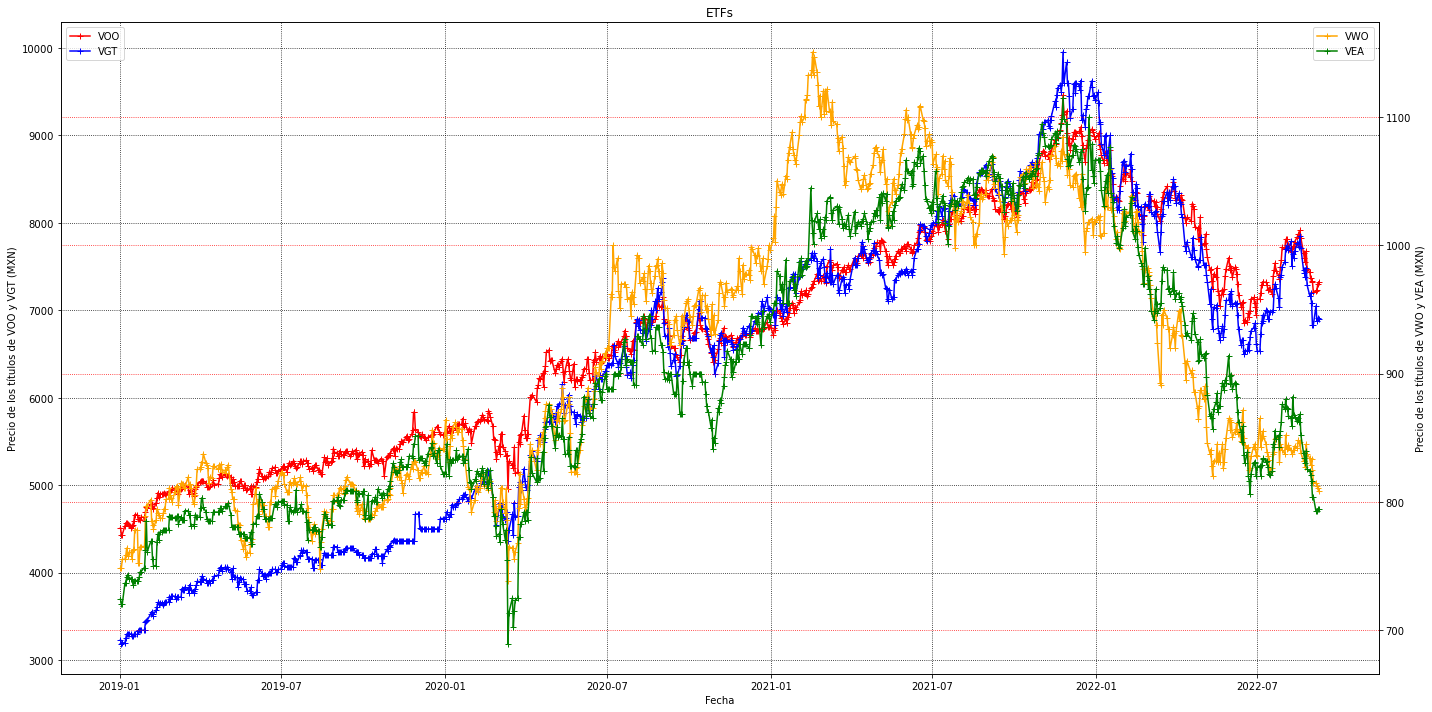

In [101]:
fig, ax = plt.subplots(figsize = (20, 10)) 
plt.title('ETFs')
ax2 = ax.twinx() 

ax.plot(ETFS['VOO'], color='red', marker='+', label='VOO')
ax.plot(ETFS['VGT'], color='blue', marker='+', label='VGT')
ax2.plot(ETFS['VWO'], color='orange', marker='+', label='VWO')
ax2.plot(ETFS['VEA'], color='green', marker='+', label='VEA')

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio de los títulos de VOO y VGT (MXN)')
ax2.set_ylabel('Precio de los títulos de VWO y VEA (MXN)')

plt.tight_layout()

#Mostramos ambas leyendas
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

#Mostramos la gráfica pero con grid (en X y Y)
ax.grid(axis='both',linestyle='dotted',color='k')
ax2.grid(axis='both',linestyle='dotted',color='r')

plt.show()

In [52]:
ETFS.corr()

,VOO,VWO,VEA,VGT
VOO,1.000000,0.793828,0.900622,0.990308
VWO,0.793828,1.000000,0.946317,0.829758
VEA,0.900622,0.946317,1.000000,0.906477
VGT,0.990308,0.829758,0.906477,1.000000


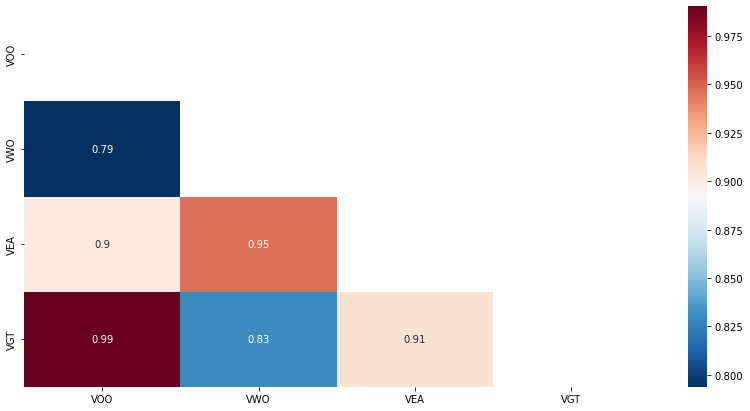

In [53]:
plt.figure(figsize=(14,7))
MatrizInfETFs = np.triu(ETFS.corr())
sns.heatmap(ETFS.corr(), cmap='RdBu_r', annot=True, mask=MatrizInfETFs)
plt.show()

In [54]:
DataETF = yf.download(['VOO', 'VWO', 'VEA', 'VGT'], start='2019-1-1', end='2022-09-09', 
                interval='1d')
DataETF

[*********************100%***********************]  4 of 4 completed


Adj Close                                         Close  \
                  VEA         VGT         VOO        VWO        VEA   
Date                                                                  
2019-01-02  33.444992  161.344620  216.624023  34.916801  37.049999   
2019-01-03  33.174179  153.370636  211.453033  34.369370  36.750000   
2019-01-04  34.194229  160.039825  218.432388  35.455109  37.880001   
2019-01-07  34.302551  161.827881  220.071289  35.528095  38.000000   
2019-01-08  34.546288  163.384018  222.209396  35.728821  38.270000   
...               ...         ...         ...        ...        ...   
2022-09-01  39.919998  346.220001  364.269989  40.939999  39.919998   
2022-09-02  39.669998  342.149994  360.450012  40.610001  39.669998   
2022-09-06  39.500000  339.670013  359.239990  40.259998  39.500000   
2022-09-07  39.840000  345.079987  365.679993  40.599998  39.840000   
2022-09-08  39.900002  347.160004  368.070007  40.480000  39.900002   

                                                    High              ...  \
                   VGT         VOO        VWO        VEA         VGT  ...   
Date                                                                  ...   
2019-01-02  166.929993  229.990005  38.270000  37.080002  167.770004  ...   
2019-01-03  158.679993  224.500000  37.669998  37.000000  163.020004  ...   
2019-01-04  165.580002  231.910004  38.860001  37.950001  166.350006  ...   
2019-01-07  167.429993  233.649994  38.939999  38.200001  168.529999  ...   
2019-01-08  169.039993  235.919998  39.160000  38.380001  169.690002  ...   
...                ...         ...        ...        ...         ...  ...   
2022-09-01  346.220001  364.269989  40.939999  39.950001  346.679993  ...   
2022-09-02  342.149994  360.450012  40.610001  40.509998  351.950012  ...   
2022-09-06  339.670013  359.239990  40.259998  39.860001  343.670013  ...   
2022-09-07  345.079987  365.679993  40.599998  39.849998  346.510010  ...   
2022-09-08  347.160004  368.070007  40.480000  39.930000  348.540009  ...   

                   Low                  Open                          \
                   VOO        VWO        VEA         VGT         VOO   
Date                                                                   
2019-01-02  226.020004  37.689999  36.639999  163.550003  226.179993   
2019-01-03  223.970001  37.520000  36.930000  162.740005  228.100006   
2019-01-04  227.149994  38.139999  37.310001  161.539993  227.539993   
2019-01-07  231.320007  38.660000  37.910000  165.869995  232.289993   
2019-01-08  233.429993  38.779999  38.360001  169.070007  236.050003   
...                ...        ...        ...         ...         ...   
2022-09-01  358.510010  40.540001  39.910000  345.350006  361.100006   
2022-09-02  358.779999  40.529999  40.200001  350.000000  367.950012   
2022-09-06  357.000000  40.200001  39.779999  342.799988  361.359985   
2022-09-07  358.690002  40.060001  39.160000  340.170013  358.859985   
2022-09-08  362.269989  40.150002  39.430000  342.579987  363.380005   

                         Volume                              
                  VWO       VEA      VGT      VOO       VWO  
Date                                                         
2019-01-02  37.770000  16891700   861200  4891300  17856900  
2019-01-03  37.900002  17809700   705100  3329600  15615100  
2019-01-04  38.180000  12485600   731900  5100100  21471400  
2019-01-07  38.849998  15899600  1108000  3706000  17582800  
2019-01-08  38.990002  11334300  4256000  3546600  17090900  
...               ...       ...      ...      ...       ...  
2022-09-01  40.880001  29945900   619800  6126800  18818700  
2022-09-02  40.880001  18682000   540900  4542400  10848500  
2022-09-06  40.529999  22467800   605500  5680300  14144900  
2022-09-07  40.099998  19051900   549300  4137000   9883200  
2022-09-08  40.250000  15072500   395500  3692000  12770900  

[929 rows x 24 columns]